In [52]:

from sklearn import *
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
import plotly.graph_objects as go
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
##from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from nltk import PorterStemmer, WordNetLemmatizer
from keras.models import Sequential ##form our layers 
from keras.layers import Dense, Dropout## this helps us with overfitting
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
###Load the dataset
### Exploratory Data Analysis
###Visualization 
##Pre-processing
###Building the models 
###Accuracy 
##Testing Logistic regression model
###Deployment of the model

In [53]:
## load data set
data =pd.read_csv("amazon_reviews.csv")
df= pd.DataFrame(data)
print(df)
####label 1 = fake 
###label 2 =  real 

       DOC_ID       LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  \
0           1  __label1__       4                 N               PC   
1           2  __label1__       4                 Y         Wireless   
2           3  __label1__       3                 N             Baby   
3           4  __label1__       4                 N  Office Products   
4           5  __label1__       4                 N           Beauty   
...       ...         ...     ...               ...              ...   
20995   20996  __label2__       4                 Y            Shoes   
20996   20997  __label2__       4                 Y            Shoes   
20997   20998  __label2__       5                 Y            Shoes   
20998   20999  __label2__       5                 Y            Shoes   
20999   21000  __label2__       4                 Y            Shoes   

       PRODUCT_ID                                      PRODUCT_TITLE  \
0      B00008NG7N        Targus PAUK10U Ultra Mini USB Keypad, 

In [48]:

####EXPLORATORY DATA ANALYSIS 
df.head(4)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...


In [45]:
##changing label1 and label2 to real and fake 
df.loc[df['LABEL']== "__label1__", 'LABEL']= 'FAKE'
df.loc[df['LABEL']== "__label2__", 'LABEL']= 'REAL'

In [126]:
df.head(2)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,FAKE,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,FAKE,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...


In [9]:
pd.get_option('display.max_rows')

60

In [52]:
df.describe()

,DOC_ID,RATING
count,21000.000000,21000.000000
mean,10500.500000,4.127952
std,6062.322162,1.278333
min,1.000000,1.000000
25%,5250.750000,4.000000
50%,10500.500000,5.000000
75%,15750.250000,5.000000
max,21000.000000,5.000000


In [53]:
df.nunique()

DOC_ID               21000
LABEL                    2
RATING                   5
VERIFIED_PURCHASE        2
PRODUCT_CATEGORY        30
PRODUCT_ID           18857
PRODUCT_TITLE        18865
REVIEW_TITLE         18476
REVIEW_TEXT          21000
dtype: int64

In [21]:
##unique values in order 
def check_type(dataframe):
    nunique_df= pd.DataFrame({'Variables': dataframe.columns,
                              'Types': [dataframe[i].nunique() \
                                        for i in dataframe.columns]})
    nunique_df=nunique_df.sort_values('Types',ascending=False)
    nunique_df=nunique_df.reset_index(drop=True)
    return nunique_df

check_type(df)

,Variables,Types
0,DOC_ID,21000
1,REVIEW_TEXT,21000
2,PRODUCT_TITLE,18865
3,PRODUCT_ID,18857
4,REVIEW_TITLE,18476
5,PRODUCT_CATEGORY,30
6,RATING,5
7,LABEL,2
8,VERIFIED_PURCHASE,2


In [54]:
df['PRODUCT_CATEGORY'].unique()

array(['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty',
       'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture',
       'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books',
       'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes',
       'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden',
       'Pet Products', 'Home Entertainment', 'Musical Instruments',
       'Watches', 'Automotive'], dtype=object)

In [150]:
df['PRODUCT_TITLE'].unique()


array(['Targus PAUK10U Ultra Mini USB Keypad, Black',
       'Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable',
       'Fisher-Price Papasan Cradle Swing, Starlight', ...,
       "Minnetonka Men's 703 Leather Laced Softsole Moccasin,Brown,10.5 M US",
       'Ariat Womens Unbridled Fatbaby 9 B Powder Brown',
       'VIBRAM FIVEFINGERS SPEED XC MENS HIKING SHOES, Black/yellow 44 M EU'],
      dtype=object)

In [ ]:
plt.bar()

In [11]:
df.dtypes

DOC_ID                int64
LABEL                object
RATING                int64
VERIFIED_PURCHASE    object
PRODUCT_CATEGORY     object
PRODUCT_ID           object
PRODUCT_TITLE        object
REVIEW_TITLE         object
REVIEW_TEXT          object
dtype: object

In [12]:
df.shape

(21000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [15]:
df.columns###or df.keys()

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [23]:

df.iloc[:,3]

0        N
1        Y
2        N
3        N
4        N
        ..
20995    Y
20996    Y
20997    Y
20998    Y
20999    Y
Name: VERIFIED_PURCHASE, Length: 21000, dtype: object

In [24]:
##Access multiple columns by numerical index 
df.iloc[:, [2,4,5]]

,RATING,PRODUCT_CATEGORY,PRODUCT_ID
0,4,PC,B00008NG7N
1,4,Wireless,B00LH0Y3NM
2,3,Baby,B000I5UZ1Q
3,4,Office Products,B003822IRA
4,4,Beauty,B00PWSAXAM
...,...,...,...
20995,4,Shoes,B00BXYM8T8
20996,4,Shoes,B0014C2ORK
20997,5,Shoes,B000EX8CCQ
20998,5,Shoes,B00748YHVE


In [25]:
##Access columns with a column subset
df[df.columns[[2,4,5]]]

,RATING,PRODUCT_CATEGORY,PRODUCT_ID
0,4,PC,B00008NG7N
1,4,Wireless,B00LH0Y3NM
2,3,Baby,B000I5UZ1Q
3,4,Office Products,B003822IRA
4,4,Beauty,B00PWSAXAM
...,...,...,...
20995,4,Shoes,B00BXYM8T8
20996,4,Shoes,B0014C2ORK
20997,5,Shoes,B000EX8CCQ
20998,5,Shoes,B00748YHVE


In [18]:
df.LABEL

0        FAKE
1        FAKE
2        FAKE
3        FAKE
4        FAKE
         ... 
20995    REAL
20996    REAL
20997    REAL
20998    REAL
20999    REAL
Name: LABEL, Length: 21000, dtype: object

In [87]:
df['REVIEW_TITLE']

0                                                   useful
1                                    New era for batteries
2                                 doesn't swing very well.
3                                         Great computing!
4                                    Only use twice a week
                               ...                        
20995                                 wide width is great!
20996                                          Love crocs!
20997    I love moccasins This fit like it was custom m...
20998          This fit well, comfortable, best investment
20999               Love these shoes, except for the laces
Name: REVIEW_TITLE, Length: 21000, dtype: object

In [31]:
df[['REVIEW_TITLE','PRODUCT_TITLE']].head(3)


,REVIEW_TITLE,PRODUCT_TITLE
0,useful,"Targus PAUK10U Ultra Mini USB Keypad, Black"
1,New era for batteries,Note 3 Battery : Stalion Strength Replacement ...
2,doesn't swing very well.,"Fisher-Price Papasan Cradle Swing, Starlight"


In [20]:

df.iloc[:,1:3]

,LABEL,RATING
0,FAKE,4
1,FAKE,4
2,FAKE,3
3,FAKE,4
4,FAKE,4
...,...,...
20995,REAL,4
20996,REAL,4
20997,REAL,5
20998,REAL,5


In [15]:
###Checking if the data is imbalanced, label 1 and label 2(Fake and real) are equal
df['LABEL'].value_counts()
###it looks we do not need to apply SMOTE 


FAKE    10500
REAL    10500
Name: LABEL, dtype: int64

In [21]:
df['VERIFIED_PURCHASE'].value_counts()

Y    11698
N     9302
Name: VERIFIED_PURCHASE, dtype: int64

In [21]:
VP=df.VERIFIED_PURCHASE.value_counts().index

In [22]:
vp=df.VERIFIED_PURCHASE.value_counts().values

([<matplotlib.patches.Wedge at 0x2ef27db3ee0>,
 [Text(-0.19608869932499642, 1.0823812738573368, 'Y'),
  Text(0.1960886993249963, -1.0823812738573368, 'N')],
 [Text(-0.10695747235908895, 0.5903897857403655, '55.70%'),
  Text(0.10695747235908888, -0.5903897857403655, '44.30%')])

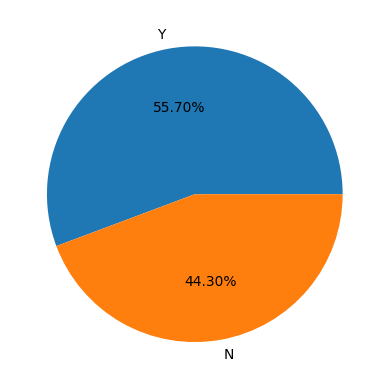

In [58]:
##pie chart and percentage of verified reviews and no verified reviews
plt.pie(vp,labels=VP,autopct='%1.2f%%')

In [11]:
VP=df.REVIEW_TITLE.value_counts().index

In [12]:
##Review Title, pie chart showing 5 top review titles
vp=df.REVIEW_TITLE.value_counts().values

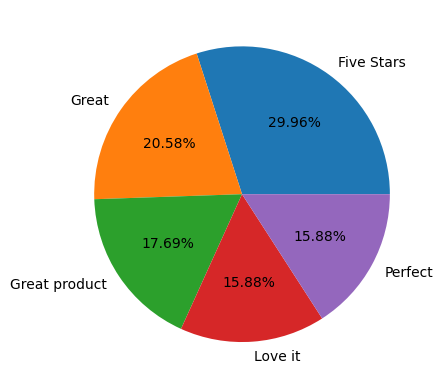

In [26]:
###top 5 
plt.pie(vp[:5],labels=VP[:5],autopct='%1.2f%%')

In [80]:
title= df[df['REVIEW_TITLE'] == 'Five Stars']
title= df[df['REVIEW_TITLE'] == 'Love it']
title= df[df['REVIEW_TITLE'] == 'Perfect']
title= df[df['REVIEW_TITLE'] == 'Great product']
title= df[df['REVIEW_TITLE'] == 'Great']

In [105]:
## As we have a top of 5 we would like to know the amount for fake review and real reviews 
df[df.PRODUCT_CATEGORY==df.PRODUCT_CATEGORY.max()]

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
1,2,FAKE,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
32,33,FAKE,1,N,Wireless,B00FA9DMDS,"iPhone 5S Case, Caseology [Fusion Series] Scra...",Changed color,The sides of the case didn't match my phone at...
54,55,FAKE,4,Y,Wireless,B00V9QGFJO,Galaxy S6 Case : Stalion® [Hybrid Bumper Serie...,Easy to carry.,"Love this case, it's very sleek and slides int..."
78,79,FAKE,1,N,Wireless,B004SH9BM4,SODIAL For Apple iPhone 4 Hello Kitty Design P...,cheap,I recently bought this item and the case did n...
121,122,FAKE,4,N,Wireless,B009A5204K,LG Tone HBS-730 Wireless Stereo Headset - Black,Great hands-free device,"Good product, especially for the price. I can ..."
...,...,...,...,...,...,...,...,...,...
20668,20669,REAL,5,Y,Wireless,B00EC4G53Q,rooCASE Samsung Galaxy Tab 3 10.1: Executive L...,Love it,I love this case! It is exactly what I was lo...
20674,20675,REAL,2,N,Wireless,B00EN6D8H4,"LG Exalt, Black (Verizon Wireless)",Expensive basic phone,"Pro : Excellent reception, call quality and so..."
20678,20679,REAL,5,Y,Wireless,B00ANALDWQ,Spigen Slim Armor iPhone 5S / 5 Case with Adva...,Best fitting case around,A perfect fit! Have never seen such a nice fit...
20685,20686,REAL,5,Y,Wireless,B00BUJ3CZU,KlearKare Invisible Screen Shield Protector fo...,"10/10 Great Product, well buy and use on all m...",Love the product. Film was very easy to apply ...


In [119]:
df.head(2)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,1,0,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116
1,2,0,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404


In [120]:
df['NUM_SENTENCE'] = df['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))


In [121]:
df.head(2)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,NUM_SENTENCE
0,1,0,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,0,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4


In [88]:
df.groupby(['REVIEW_TITLE']).size()

REVIEW_TITLE
  Works fine for me                                                             1
!!!You have to OWN this WATCH!!!                                                1
#1                                                                              1
#69 Down Hook Bolt-On to Hook-On Conversion Bracket for Headboard by BedClaw    1
#NAME?                                                                          1
                                                                               ..
zzzZZZ!                                                                         1
ヽ(◉◡◔)ﾉ                                                                         1
很好like them very much                                                           1
非常好                                                                             1
���� Great Cement����                                                           1
Length: 18476, dtype: int64

In [7]:
##Product category pie chart showing percentage of the 13 top products
VP1=df.PRODUCT_CATEGORY.value_counts().index

In [8]:
vp1=df.PRODUCT_CATEGORY.value_counts().values

([<matplotlib.patches.Wedge at 0x1ea840556c0>,
 [Text(1.068035996798755, 0.26324724033138536, 'PC'),
  Text(0.823361803287838, 0.7294349463019987, 'Wireless'),
  Text(0.3900653294502541, 1.028517884511915, 'Watches'),
  Text(-0.13259041709524613, 1.0919797531522775, 'Musical Instruments'),
  Text(-0.6248712947530938, 0.9052822018539812, 'Home Entertainment'),
  Text(-0.9740016788413467, 0.511195392794417, 'Pet Products'),
  Text(-1.0999999999999925, -1.2873679100373929e-07, 'Lawn and Garden'),
  Text(-0.9740015591874032, -0.511195620775949, 'Apparel'),
  Text(-0.6248710828564846, -0.9052823481156387, 'Video Games'),
  Text(-0.132590161498935, -1.0919797841872745, 'Luggage'),
  Text(0.39006557019222826, -1.0285177932105074, 'Outdoors'),
  Text(0.8233619740243863, -0.7294347535802403, 'Shoes'),
  Text(1.0680360584161892, -0.263246990339511, 'Home Improvement')],
 [Text(0.5825650891629571, 0.14358940381711927, '7.69%'),
  Text(0.4491064381570025, 0.3978736070738174, '7.69%'),
  Text(0.212

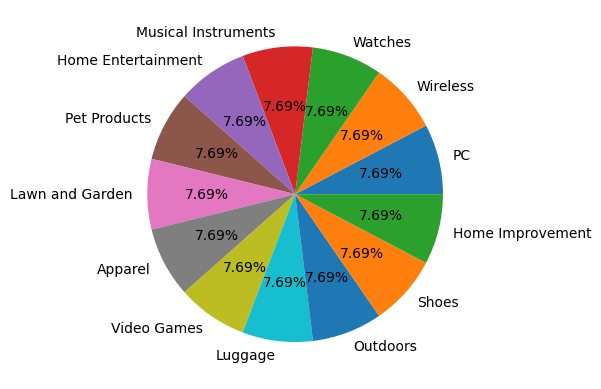

In [10]:
plt.pie(vp1[:13],labels=VP1[:13],autopct='%1.2f%%')


In [11]:
groups=df.groupby(['REVIEW_TITLE','LABEL', 'VERIFIED_PURCHASE', 'PRODUCT_ID', 'RATING']).size().reset_index()
groups


,REVIEW_TITLE,LABEL,VERIFIED_PURCHASE,PRODUCT_ID,RATING,0
0,Works fine for me,FAKE,N,B00EV4CFG8,5,1
1,!!!You have to OWN this WATCH!!!,REAL,Y,B00F8Y6WIM,5,1
2,#1,FAKE,N,B00L1WUB4Q,5,1
3,#69 Down Hook Bolt-On to Hook-On Conversion Br...,REAL,Y,B0074OOJ5C,4,1
4,#NAME?,REAL,Y,B0043AK0O4,5,1
...,...,...,...,...,...,...
20988,zzzZZZ!,FAKE,N,B003BYQ092,3,1
20989,ヽ(◉◡◔)ﾉ,REAL,Y,B0098FKIZU,5,1
20990,很好like them very much,REAL,Y,B0009IZX46,4,1
20991,非常好,REAL,Y,B004I5CR9U,5,1


In [ ]:
##when rating is between 4.5 to 5.0 ---- excellent
##when rating is between 4.0 to 4.4 ---very good
##when rating is between 3.5 to 3.9----regular
##when rating is between 2.0 to 2.5 ---bad

<AxesSubplot: xlabel='RATING', ylabel='LABEL'>

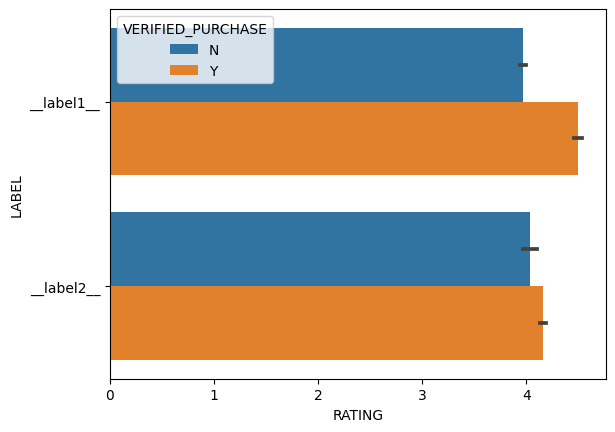

In [14]:
sns.barplot(x='RATING', y='LABEL', hue='VERIFIED_PURCHASE', data=groups)

In [ ]:
##observations


<AxesSubplot: xlabel='RATING', ylabel='count'>

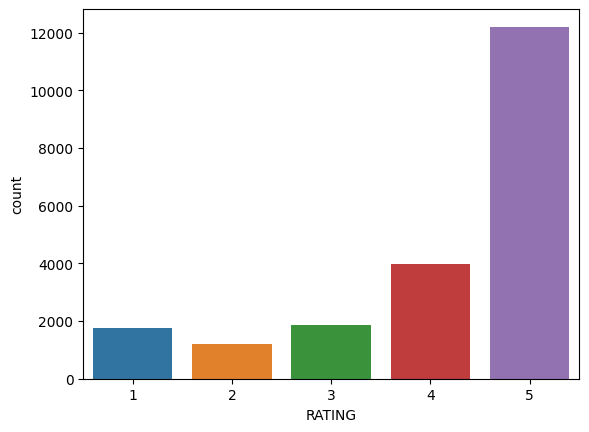

In [17]:
sns.countplot(x='RATING', data=groups)

In [23]:
df[df['RATING']== 5 ].groupby('LABEL').size().reset_index()

,LABEL,0
0,FAKE,6059
1,REAL,6151


In [24]:
df[['REVIEW_TITLE','PRODUCT_ID','LABEL','REVIEW_TEXT','PRODUCT_CATEGORY']].groupby(['REVIEW_TITLE','PRODUCT_ID','LABEL','REVIEW_TEXT','PRODUCT_CATEGORY']).size().reset_index()

,REVIEW_TITLE,PRODUCT_ID,LABEL,REVIEW_TEXT,PRODUCT_CATEGORY,0
0,Works fine for me,B00EV4CFG8,FAKE,"While you are searching a cheaper priced ink, ...",Office Products,1
1,!!!You have to OWN this WATCH!!!,B00F8Y6WIM,REAL,Is a GORGEOUS watch!!! If u looking for someth...,Watches,1
2,#1,B00L1WUB4Q,FAKE,It's been a year since I bought this device an...,Outdoors,1
3,#69 Down Hook Bolt-On to Hook-On Conversion Br...,B0074OOJ5C,REAL,"Bought two sets. Worked great, but found the ...",Furniture,1
4,#NAME?,B0043AK0O4,REAL,Everything I was hoping for:<br />-Sets up eas...,Outdoors,1
...,...,...,...,...,...,...
20995,zzzZZZ!,B003BYQ092,FAKE,after my dog made short work of the cheap bed ...,Pet Products,1
20996,ヽ(◉◡◔)ﾉ,B0098FKIZU,REAL,This is an awesome design and I want one now. ...,Wireless,1
20997,很好like them very much,B0009IZX46,REAL,这双鞋尺码非常合适，款式好看。they are very good looking shoe...,Shoes,1
20998,非常好,B004I5CR9U,REAL,"Like the Bao Luhua brand, hollow design looks ...",Watches,1


In [25]:
df.groupby(['LABEL','REVIEW_TITLE'], as_index=False)['PRODUCT_ID'].sum()

,LABEL,REVIEW_TITLE,PRODUCT_ID
0,FAKE,Works fine for me,B00EV4CFG8
1,FAKE,#1,B00L1WUB4Q
2,FAKE,$200 fashion statement,B008DS0XYE
3,FAKE,'pole' broke,B001M0O2BA
4,FAKE,) We get better yield out of standard cartridg...,B00DF53YGE
...,...,...,...
18936,REAL,yummy,B005K4Q1VI
18937,REAL,ヽ(◉◡◔)ﾉ,B0098FKIZU
18938,REAL,很好like them very much,B0009IZX46
18939,REAL,非常好,B004I5CR9U


In [54]:
df['PRODUCT_CATEGORY'].value_counts()

PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: PRODUCT_CATEGORY, dtype: int64

In [56]:
df.groupby(['PRODUCT_CATEGORY'])['VERIFIED_PURCHASE'].value_counts()

PRODUCT_CATEGORY        VERIFIED_PURCHASE
Apparel                 Y                    481
                        N                    219
Automotive              Y                    458
                        N                    242
Baby                    N                    370
                        Y                    330
Beauty                  Y                    470
                        N                    230
Books                   N                    449
                        Y                    251
Camera                  Y                    394
                        N                    306
Electronics             Y                    396
                        N                    304
Furniture               N                    359
                        Y                    341
Grocery                 N                    389
                        Y                    311
Health & Personal Care  Y                    435
                        N  

In [7]:
df.keys()

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [26]:
df.groupby(['LABEL','RATING'], as_index=False)['PRODUCT_CATEGORY'].sum()

,LABEL,RATING,PRODUCT_CATEGORY
0,FAKE,1,Health & Personal CareHealth & Personal CareWi...
1,FAKE,2,Health & Personal CareBeautyBabyLuggageBeautyE...
2,FAKE,3,BabyHealth & Personal CareCameraPCBabyCameraOf...
3,FAKE,4,PCWirelessOffice ProductsBeautyToysBeautyHealt...
4,FAKE,5,Lawn and GardenHealth & Personal CareHealth & ...
5,REAL,1,Pet ProductsPCSportsAutomotiveHome Entertainme...
6,REAL,2,BabyToolsOffice ProductsToysBeautyJewelryVideo...
7,REAL,3,Office ProductsBabyPCVideo DVDOutdoorsVideo DV...
8,REAL,4,WirelessWatchesWatchesWatchesToysHome Improvem...
9,REAL,5,Office ProductsToysToysHome ImprovementToolsLu...


In [27]:
df.groupby(['RATING'])['LABEL'].value_counts()


RATING  LABEL
1       FAKE      889
        REAL      868
2       FAKE      627
        REAL      565
3       REAL      942
        FAKE      926
4       FAKE     1999
        REAL     1974
5       REAL     6151
        FAKE     6059
Name: LABEL, dtype: int64

In [28]:
df.groupby(['VERIFIED_PURCHASE'])['LABEL'].value_counts()

VERIFIED_PURCHASE  LABEL
N                  FAKE     7623
                   REAL     1679
Y                  REAL     8821
                   FAKE     2877
Name: LABEL, dtype: int64

In [53]:
df.groupby(['REVIEW_TITLE'])['LABEL'].value_counts()

REVIEW_TITLE                                                                  LABEL
  Works fine for me                                                           FAKE     1
!!!You have to OWN this WATCH!!!                                              REAL     1
#1                                                                            FAKE     1
#69 Down Hook Bolt-On to Hook-On Conversion Bracket for Headboard by BedClaw  REAL     1
#NAME?                                                                        REAL     1
                                                                                      ..
zzzZZZ!                                                                       FAKE     1
ヽ(◉◡◔)ﾉ                                                                       REAL     1
很好like them very much                                                         REAL     1
非常好                                                                           REAL     1
���� Great Cement����     

In [30]:
df.groupby(['VERIFIED_PURCHASE','LABEL'], as_index=False)['RATING'].sum()

,VERIFIED_PURCHASE,LABEL,RATING
0,N,FAKE,30266
1,N,REAL,6777
2,Y,FAKE,12946
3,Y,REAL,36698


In [31]:
df.head(4)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,FAKE,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,FAKE,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,FAKE,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,FAKE,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...


In [32]:
df.groupby(['VERIFIED_PURCHASE', 'REVIEW_TITLE', 'RATING', 'LABEL']).size().reset_index().rename(columns={0:'R'})

,VERIFIED_PURCHASE,REVIEW_TITLE,RATING,LABEL,R
0,N,Works fine for me,5,FAKE,1
1,N,#1,5,FAKE,1
2,N,$200 fashion statement,2,FAKE,1
3,N,'pole' broke,2,FAKE,1
4,N,(3.5 STARS) Too Long But Ultimately Rewarding ...,4,REAL,1
...,...,...,...,...,...
19570,Y,yummy,5,REAL,1
19571,Y,yummyyyy....:),5,FAKE,1
19572,Y,ヽ(◉◡◔)ﾉ,5,REAL,1
19573,Y,很好like them very much,4,REAL,1


In [94]:
REVIEWS=pd.pivot_table(df, index= 'REVIEW_TITLE', columns='VERIFIED_PURCHASE', values= 'RATING')

In [95]:
REVIEWS

VERIFIED_PURCHASE,N,Y
REVIEW_TITLE,,
Works fine for me,5.0,NaN
!!!You have to OWN this WATCH!!!,NaN,5.0
#1,5.0,NaN
#69 Down Hook Bolt-On to Hook-On Conversion Bracket for Headboard by BedClaw,NaN,4.0
#NAME?,NaN,5.0
...,...,...
zzzZZZ!,3.0,NaN
ヽ(◉◡◔)ﾉ,NaN,5.0
很好like them very much,NaN,4.0


In [99]:
df['RATING'].isnull().sum()

0

In [36]:
REVIEWS=pd.pivot_table(df[df['VERIFIED_PURCHASE']=='N'],index='REVIEW_TITLE',values='RATING')

In [37]:
REVIEWS

,RATING
REVIEW_TITLE,
Works fine for me,5.0
#1,5.0
$200 fashion statement,2.0
'pole' broke,2.0
(3.5 STARS) Too Long But Ultimately Rewarding Experience,4.0
...,...
"you're much better off trying trying to find ""natural"" chocolate if you ...",5.0
yum,4.0
yum yumm!,4.0


In [187]:
###REVIEWS=REVIEWS[REVIEWS.RATING > 0]
##CHECKING ALL REVIEWS VALUES WHEN THEY ARE FAKE(label1).
##Here we can appreciate some characteristics related to fake reviews.
REV=df[df['LABEL']== 'FAKE']

In [189]:
REV.head(10)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,FAKE,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,FAKE,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,FAKE,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,FAKE,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,FAKE,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...
5,6,FAKE,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,I'm not sure what this is supposed to be but I...
6,7,FAKE,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,Pleased with ping pong table. 11 year old and ...
7,8,FAKE,4,Y,Beauty,B00QUL8VX6,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,Great vitamin C serum... I really like the oil...
8,9,FAKE,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,I've used tide pods laundry detergent for many...
9,10,FAKE,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,Everybody wants to fall for their promises. Bu...


In [199]:
df.REVIEW_TEXT[20500]

'A wonderful Clark!!  Just what I expected.  Very comfortable and a nice looking shoe.  I could not be happier. I Love Clark Shoes!!!!!!'

In [37]:
df.head(10)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,FAKE,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,FAKE,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,FAKE,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,FAKE,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,FAKE,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...
5,6,FAKE,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,I'm not sure what this is supposed to be but I...
6,7,FAKE,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,Pleased with ping pong table. 11 year old and ...
7,8,FAKE,4,Y,Beauty,B00QUL8VX6,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,Great vitamin C serum... I really like the oil...
8,9,FAKE,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,I've used tide pods laundry detergent for many...
9,10,FAKE,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,Everybody wants to fall for their promises. Bu...


In [100]:
categorical =df.dtypes[df.dtypes == 'object'].index
print(categorical)

Index(['LABEL', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY', 'PRODUCT_ID',
       'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')


In [42]:
df[categorical].describe()
##for example for the verified purchase: 2 unique values(Y/N) the top is Y and there are 11698 entries for Y(yes)
##Product_category top PC and with 700 entries, here we have 30 different products
##  Label with 2 unique values: Fake (10.500 ) and Real (10.500). 


,LABEL,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
count,21000,21000,21000,21000,21000,21000,21000
unique,2,2,30,18857,18865,18476,21000
top,FAKE,Y,PC,B0010O748Q,Honey Badger Garden Gloves for Digging & Plant...,Five Stars,"When least you think so, this product will sav..."
freq,10500,11698,700,4,5,83,1


In [178]:
sorted(df['REVIEW_TITLE']) [0:15]

['  Works fine for me',
 '!!!You have to OWN this WATCH!!!',
 '#1',
 '#69 Down Hook Bolt-On to Hook-On Conversion Bracket for Headboard by BedClaw',
 '#NAME?',
 '$200 fashion statement',
 '$8 and works',
 "'pole' broke",
 '(3.5 STARS) Too Long But Ultimately Rewarding Experience',
 '(3.5 STARS) Unbelievable, Still Darkly Entertaining',
 '(BLU RAY REVIEW) 3 1/2 stars.  More moonlight than magic',
 '(DVD REVIEW) 3 1/2 stars.  Strong performances, great music',
 ') We get better yield out of standard cartridges from the manufacturer',
 '***BEWARE*** These are Mylar Food Bags!!!',
 '***Long term review***']

In [55]:
df['REVIEW_TITLE'].describe()
##REVIEW_TITLE has unique values of 18.476 but the total count is 21.000.
##when a categorical value has almost unique values as the total records is usually suspect in terms whether it would be useful for prediction or not. 

count          21000
unique         18476
top       Five Stars
freq              83
Name: REVIEW_TITLE, dtype: object

In [49]:
##as an example if we need to transform data as categorical
new_label =pd.Categorical(df['LABEL'])
new_label=new_label.rename_categories(['FAKE', 'REAL'])
new_label.describe()

,counts,freqs
categories,,
FAKE,10500,0.5
REAL,10500,0.5


In [ ]:
##new_reviews =pd.Categorical(df['REVIEW_TITLE'],
##ordered=True)
##new_reviews=new_reviews.rename_categories([])
##new_reviews.describe()


In [23]:
df['REVIEW_TITLE'].unique()

array(['useful', 'New era for batteries', "doesn't swing very well.", ...,
       'I love moccasins This fit like it was custom made for ...',
       'This fit well, comfortable, best investment',
       'Love these shoes, except for the laces'], dtype=object)

In [25]:
len(df['REVIEW_TITLE'].unique())

18476

In [16]:
df['REVIEW_TEXT'].unique()

array(['When least you think so, this product will save the day. Just keep it around just in case you need it for something.',
       "Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.",
       "I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money.",
       ...,
       'I love moccasins  This fit like it was custom made for me.<br />Very soft and comfortable.  Double leather bottom so I will wear it everywhere except when walking on street or sid

In [17]:
df['REVIEW_TITLE'].unique()

array(['useful', 'New era for batteries', "doesn't swing very well.", ...,
       'I love moccasins This fit like it was custom made for ...',
       'This fit well, comfortable, best investment',
       'Love these shoes, except for the laces'], dtype=object)

In [43]:
##reviewf=df.groupby('REVIEW_TITLE').get_group('useful')

In [10]:
##How many products are there? 
print(df["PRODUCT_CATEGORY"].nunique())
df['PRODUCT_CATEGORY'].unique()

30


array(['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty',
       'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture',
       'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books',
       'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes',
       'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden',
       'Pet Products', 'Home Entertainment', 'Musical Instruments',
       'Watches', 'Automotive'], dtype=object)

In [16]:
###How many product title have maximum ratings ?


print(df['PRODUCT_TITLE'][df['RATING']==df['RATING'].max()].nunique())
print(print(df['PRODUCT_TITLE'][df['RATING']==df['RATING'].max()].unique()))

11222
['Sovereign Precision SPSG579967 Silicone BBQ Glove Set'
 'Jelly Dildo Vibrator by Healthy Vibes (Purple, 8") - Flexible, Wireless Dong with Multispeed Control and Realistic Texture and Size for Deep Penetration and G-Spot Pleasure - Phthalate and Latex Free'
 'Huntington Labs Forskolin Unisex Dietary Supplement, 60 Veggie Capsules'
 ...
 "Isotoner Women's Microterry PillowStep Satin Cuff Clog Slippers, Black,7.5/8"
 "Minnetonka Men's 703 Leather Laced Softsole Moccasin,Brown,10.5 M US"
 'Ariat Womens Unbridled Fatbaby 9 B Powder Brown']
None


In [14]:
df.columns

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [15]:
###How many product title has minimum rating?
print(df['PRODUCT_TITLE'][df['RATING']==df['RATING'].min()].nunique())
print(print(df['PRODUCT_TITLE'][df['RATING']==df['RATING'].min()].unique()))

1666
['Sheer TEST, Best Testosterone Booster Supplement for Men with Fenugreek, Science-Based Formula Delivers Visible Results You Can See and Feel, Full 30-Day Cycle'
 '#1 Most Potent Male Performance Enhancement Supplement - Increase Size, Stamina, Energy & Libido Fast - RUSH by Neovicta - Powerful All Natural Testosterone Support - 60 Count - Money Back Guarantee'
 'iPhone 5S Case, Caseology [Fusion Series] Scratch-Resistant Clearback Cover [Beige] [Dual Bumper] for Apple iPhone 5S - Beige'
 ...
 "Fila Women's Memory Flux Slip Resistant Training Shoe, Black/Black/Black, 8.5 M US"
 'Stride Rite Star Wars Morphing Light-Up Sneaker (Toddler/Little Kid/Big Kid),Grey/Silver,13 M US Little Kid'
 "Saucony Men's Hurricane 15 Running Shoe,White/Black/Green,12.5 M US"]
None


In [20]:
##which product has maximum number of reviews? 
df[['PRODUCT_CATEGORY', 'RATING','LABEL']] [df['REVIEW_TEXT']== df['REVIEW_TEXT'].max()]

,PRODUCT_CATEGORY,RATING,LABEL
20683,Shoes,4,REAL


In [ ]:
##which product has maximum rating/review ratio
##df_ration=df['RATING'/'REVIEW'] =df['RATING']/df['REVIEW']

In [80]:
##visualizing fake reviews dataset

df.columns

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [52]:
##REV1=pd.pivot_table(df[df['REVIEW_TITLE']=='useful'],index ='VERIFIED_PURCHASE',values='RATING')

In [43]:
i=df.VERIFIED_PURCHASE.value_counts()

C:\Users\brill\AppData\Local\Temp\ipykernel_12140\4271859509.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='LABEL', columns='VERIFIED_PURCHASE').plot(kind='bar')


<AxesSubplot: xlabel='LABEL'>

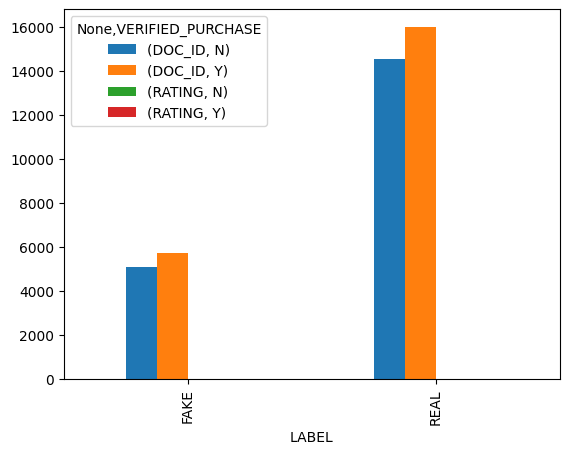

In [44]:
df.pivot_table(index='LABEL', columns='VERIFIED_PURCHASE').plot(kind='bar')

In [126]:
df.keys()

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

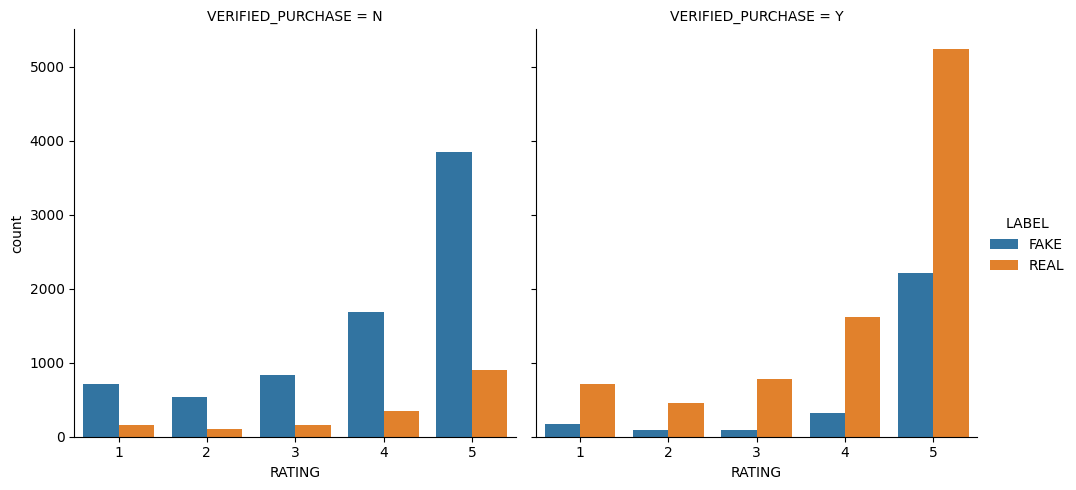

In [133]:
sns.catplot(x='RATING',data=df,hue='LABEL',
            col ='VERIFIED_PURCHASE', kind='count')

<AxesSubplot: xlabel='count', ylabel='RATING'>

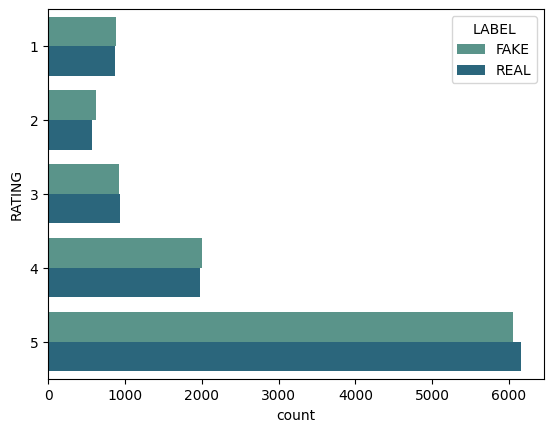

In [118]:
sns.countplot(y=df['RATING'], hue='LABEL', data=df,palette='crest')

Text(0.5, 1.0, 'Count of Real and Fake REVIEWS')

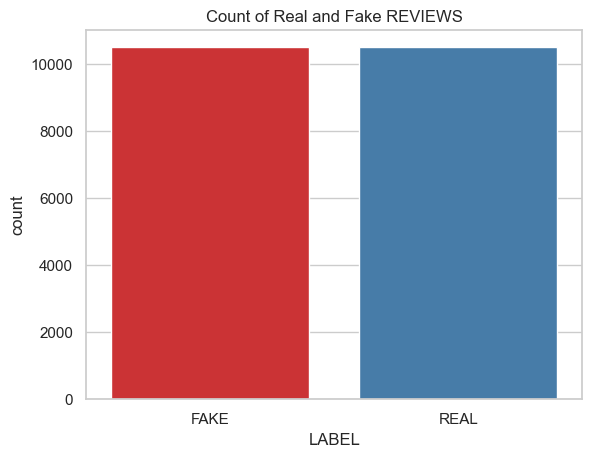

In [10]:
#plot REAL AND FAKE REVIEWS
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="LABEL", data=df, palette='Set1')
ax.set_title("Count of Real and Fake REVIEWS")

Text(0.5, 1.0, 'Count of Real and Fake REVIEWS')

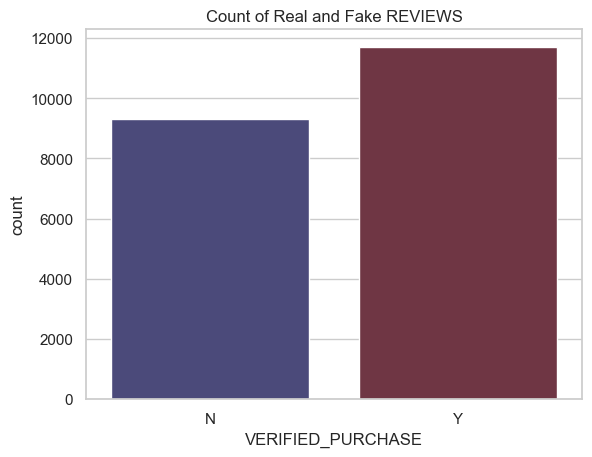

In [102]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="VERIFIED_PURCHASE", data=df, palette='icefire')
ax.set_title("Count of Real and Fake REVIEWS")

In [269]:
reviwss=df[['VERIFIED_PURCHASE','LABEL']]
reviwss

,VERIFIED_PURCHASE,LABEL
0,N,FAKE
1,Y,FAKE
2,N,FAKE
3,N,FAKE
4,N,FAKE
...,...,...
20995,Y,REAL
20996,Y,REAL
20997,Y,REAL
20998,Y,REAL


In [57]:
##create numerical values 
df.loc[df['LABEL']== "FAKE", 'LABEL']= 0
df.loc[df['LABEL']== "REAL", 'LABEL']= 1


In [58]:
df_chart=df['LABEL']=df['LABEL'].apply(pd.to_numeric)

In [30]:
df['REVIEW_TITLE'].value_counts().nlargest(3)

Five Stars       83
Great            57
Great product    49
Name: REVIEW_TITLE, dtype: int64

In [151]:
df['PRODUCT_TITLE'].value_counts().nlargest(3)

Honey Badger Garden Gloves for Digging & Planting - No More Worn Out Fingertips - Claws on BOTH Hands - Womens & Mens Unisex - PATENT PENDING    5
Walker Edison Soreno 3-Piece Corner Desk, Black with Black Glass                                                                                 4
Geneva Rose Gold Plated Round CZ Steel Back Ladies Boyfriend Watch                                                                               4
Name: PRODUCT_TITLE, dtype: int64

In [31]:
df['REVIEW_TEXT'].value_counts().nlargest(3)

When least you think so, this product will save the day. Just keep it around just in case you need it for something.                                                                                              1
great bottles. i know its a lot of parts but worth it. you don't have to worry about burping your baby as much because he or she isn't swallowing as much air                                                     1
My boys Love Sonic!! When I saw this I knew it would be a great Christmas gift and it was!! I got this one for my oldest son and the look on his face was so worth it! Great gift for any kid who likes Sonic!    1
Name: REVIEW_TEXT, dtype: int64

In [34]:
df.keys()

Index(['DOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [44]:
df['PRODUCT_CATEGORY'].value_counts().nlargest(3)

PC          700
Wireless    700
Watches     700
Name: PRODUCT_CATEGORY, dtype: int64

In [25]:
#FAKE REVIEW_TITLE
##REAL =1 , FAKE=0
df.loc[df.LABEL == 0].REVIEW_TITLE.value_counts().head(15)

Five Stars        48
Great             34
Great product     26
Love it           22
Perfect           21
Awesome           19
Excellent         19
good              17
Works great       15
Great Product     15
Great product!    15
Excellent!        14
Good              14
Works well        14
Love it!          13
Name: REVIEW_TITLE, dtype: int64

In [26]:
#REAL REVIEW_TITLE
##REAL =1 , FAKE=0
df.loc[df.LABEL == 1].REVIEW_TITLE.value_counts().head(10)

Five Stars       35
Great            23
Perfect          23
Great product    23
Love it          22
Great!           21
Awesome          20
Excellent        20
Love it!         17
Perfect!         17
Name: REVIEW_TITLE, dtype: int64

<AxesSubplot: >

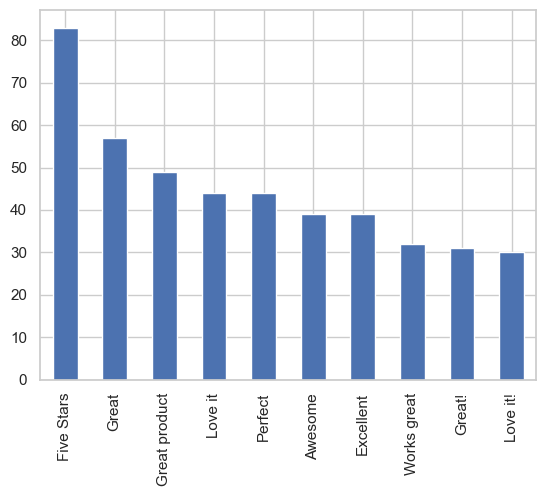

In [28]:

#find values with top 10 occurrences in 'my_column'
top_10 = (df['REVIEW_TITLE'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='bar')

Text(0.5, 1.0, 'Top 10 REVIEW_TITLE')

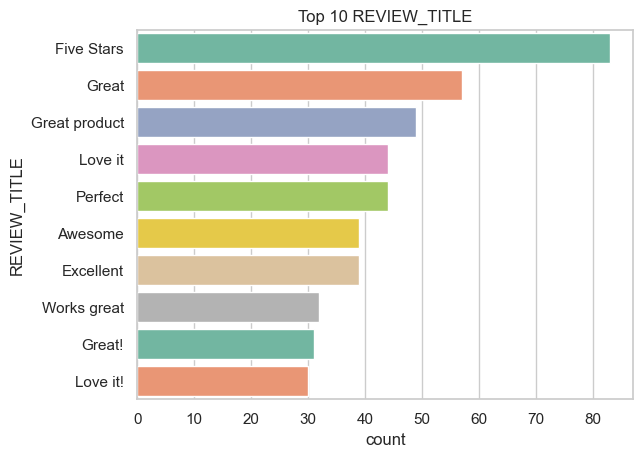

In [4]:
#plot top 10 review title
##plt.figure(figsize=(5,5)) to adjuts the size
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="REVIEW_TITLE", data= df, palette='Set2', order =df.REVIEW_TITLE.value_counts().iloc[:10].index)
ax.set_title("Top 10 REVIEW_TITLE")

Text(0.5, 1.0, 'Top 3 PRODUCT_TITLE')

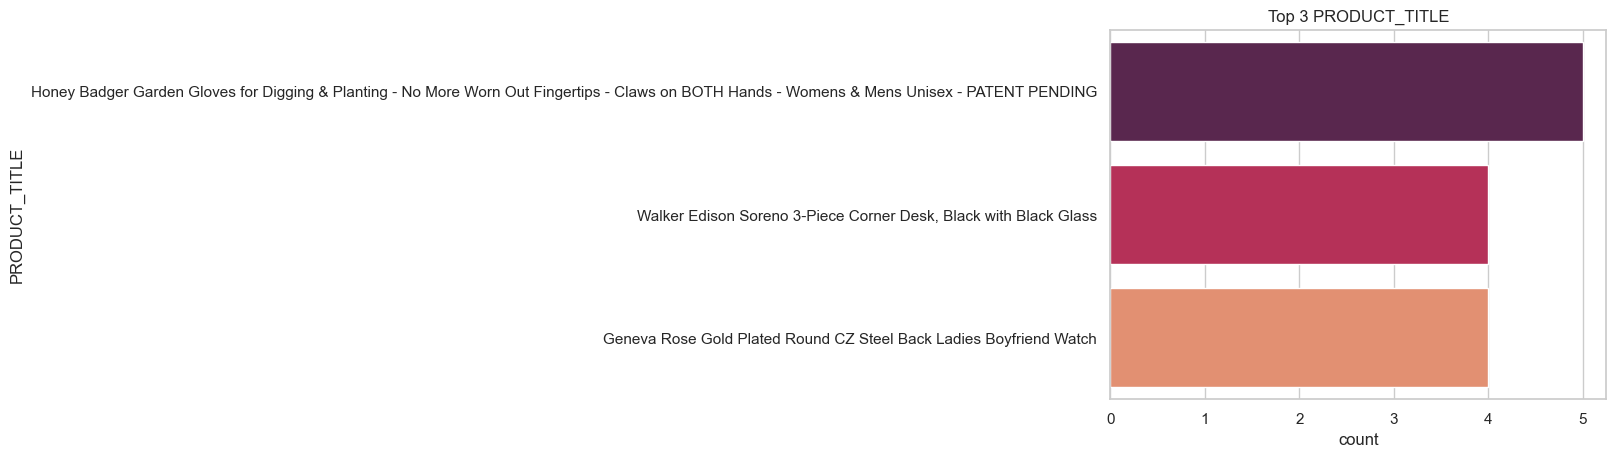

In [41]:
#plot top 10 review title
##plt.figure(figsize=(5,5)) to adjuts the size
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="PRODUCT_TITLE", data= df, palette='rocket', order =df.PRODUCT_TITLE.value_counts().iloc[:3].index)
ax.set_title("Top 3 PRODUCT_TITLE")

Text(0.5, 1.0, 'Top 3 REVIEW_TEXT')

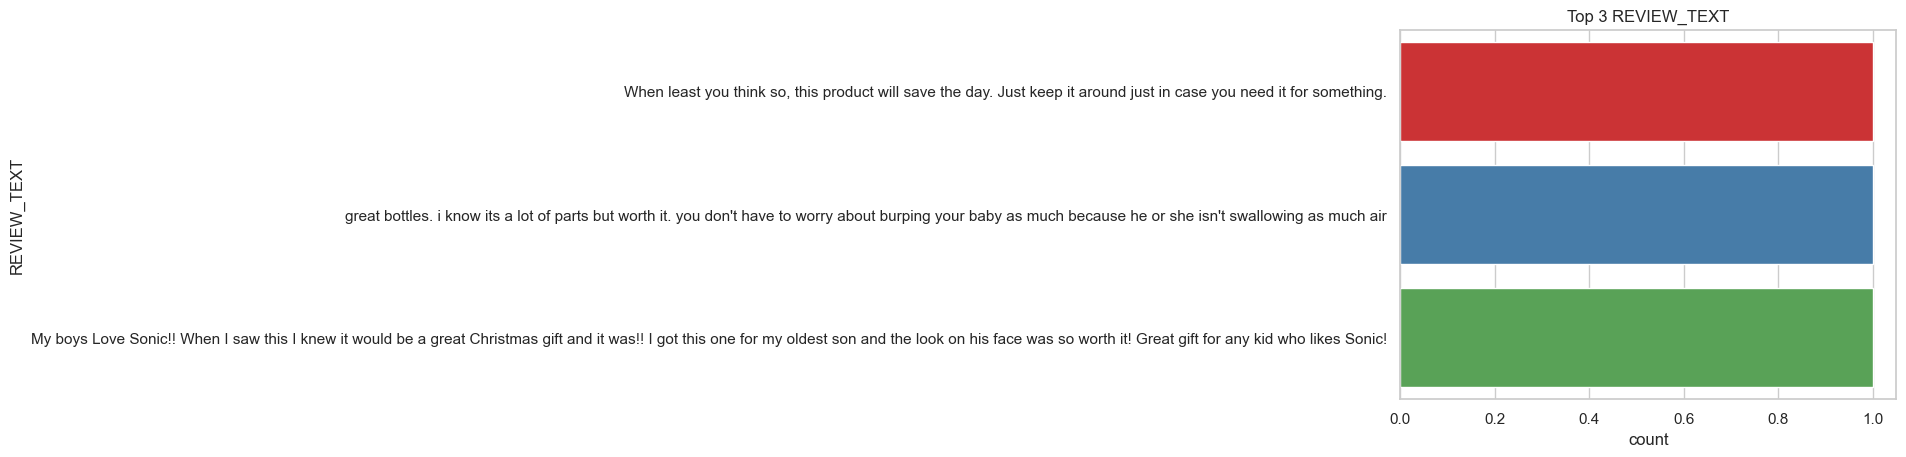

In [14]:

sns.set_theme(style="whitegrid")
ax = sns.countplot(y="REVIEW_TEXT", data= df, palette='Set1', order =df.REVIEW_TEXT.value_counts().iloc[:3].index)
ax.set_title("Top 3 REVIEW_TEXT")

Text(0.5, 1.0, 'Count of Rating')

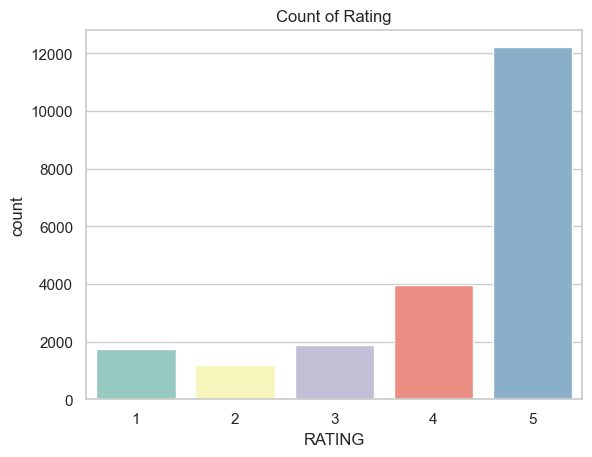

In [8]:

sns.set_theme(style="whitegrid")
ax = sns.countplot(x="RATING", data=df, palette='Set3')
ax.set_title("Count of Rating")

<AxesSubplot: xlabel='LABEL', ylabel='PRODUCT_CATEGORY'>

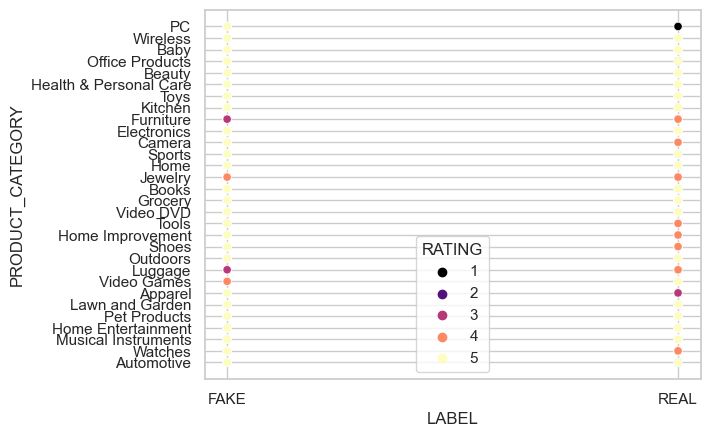

In [107]:
sns.scatterplot(x= df["LABEL"], y= df["PRODUCT_CATEGORY"], hue= df['RATING'], palette="magma")

In [30]:
new_verified =pd.Categorical(df['VERIFIED_PURCHASE'])
new_verified=new_verified.rename_categories([1.0,2.0])##1 NO and 2 Yes
new_verified.describe()

,counts,freqs
categories,,
1.0,9302,0.442952
2.0,11698,0.557048


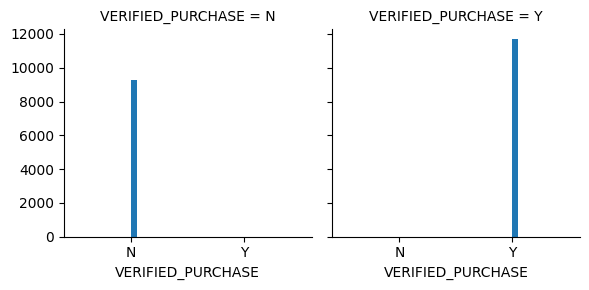

In [67]:
n= sns.FacetGrid(df, col='VERIFIED_PURCHASE')
n.map(plt.hist, 'VERIFIED_PURCHASE', bins=20)

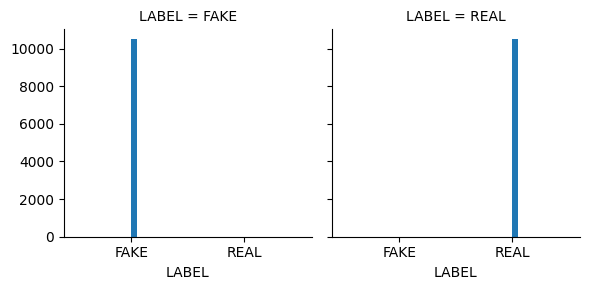

In [68]:
n= sns.FacetGrid(df, col='LABEL')
n.map(plt.hist, 'LABEL', bins=20)

In [126]:
##checking PRODUCT ID real values and fake values
REVIEW_REAL=[]
REVIEW_FAKE=[]

for i,row in df.iterrows():
    val = row['PRODUCT_ID']
    if row['LABEL'] == 'REAL':
        REVIEW_REAL.append(val)
    elif row['LABEL']== 'FAKE':
        REVIEW_FAKE.append(val)

In [127]:
unique_REVIEW_REAL=list(set(REVIEW_REAL))
unique_REVIEW_FAKE=list(set(REVIEW_FAKE))


In [ ]:
##print(unique_REVIEW_REAL)
##print(unique_REVIEW_FAKE)

In [ ]:
#### DATA CLEANING 

In [54]:
##CHANGING VERIFIED PURCHASE VALUES
df.loc[df['VERIFIED_PURCHASE']== "Y", 'VERIFIED_PURCHASE']= "VERIFIED"
df.loc[df['VERIFIED_PURCHASE']== "N", 'VERIFIED_PURCHASE']= "NO VERIFIED"


In [55]:
##CHANGING VALUES FOR LABEL: 1 FOR REAL AND 0 FOR FAKE
df.loc[df['LABEL']== "__label1__", 'LABEL']= 0
df.loc[df['LABEL']== "__label2__", 'LABEL']= 1

In [56]:
##Comparign text length and label
df1 = df.groupby("LABEL").REVIEW_TEXT

In [57]:
df['TEXT_LENGTH'] = df['REVIEW_TEXT'].apply(len)

In [58]:
Fake_real = df.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
Fake_real

LABEL
0    316.538857
1    428.064571
Name: TEXT_LENGTH, dtype: float64

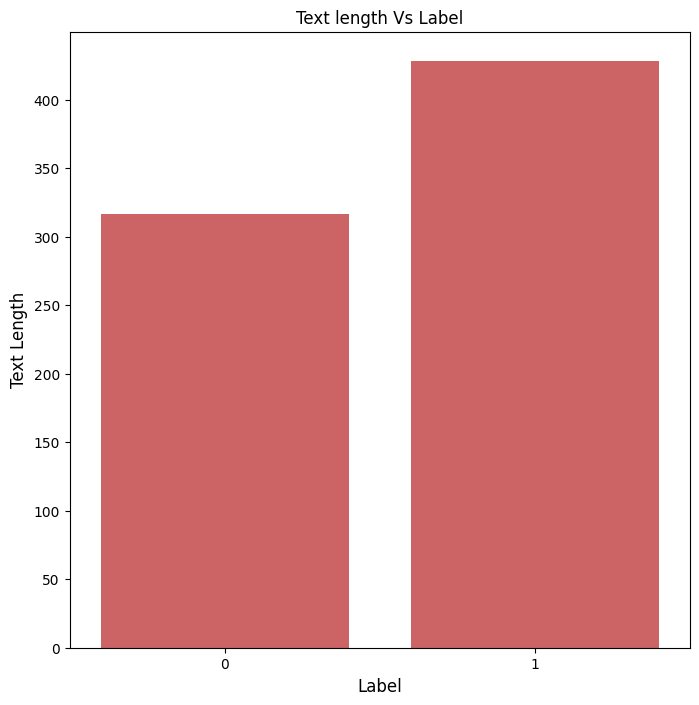

In [143]:
color = sns.color_palette()
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x=Fake_real.index, y=Fake_real.values, alpha=0.8, color=color[3])
plt.ylabel('Text Length', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.title('Text length Vs Label', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()

In [59]:
##CHANGING VALUES FOR RATING 
##POSITIVE AND NEGATIVE REVIEWS: 0 =negative and 1 positive 
df['RATING'] =np.where((df['RATING']<3),0,df.RATING)
df['RATING'] =np.where((df['RATING']>3),1,df.RATING)

In [60]:
df.RATING.value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [61]:
df1 = df.loc[data['RATING'] == 1]
print(len(df1))
df2 = df1.sample(frac=0.2, replace=True)
print(len(df2))
df3 = df1 = df.loc[data['RATING'] == 0]

16183
3237


In [62]:
df_new = pd.concat([df2, df3], ignore_index=True)
df_new

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,12046,1,1,VERIFIED,Watches,B00309HQPK,Casio Men's GW7900B-1 G-Shock Black Solar Spor...,superb watch,looks good and fits good on my hand<br />i lik...,125
1,5895,0,1,NO VERIFIED,Electronics,B004HJ57VM,Pyle Home PICL45B Enhanced iPod/iPhone Alarm C...,radio wakeup,I'm happy i got this. $50$ wasn't much for all...,202
2,5496,0,1,NO VERIFIED,Home,B00QJGNKRY,"LED Desk Lamp, Lampat Dimmable COB LED Desk La...",Very nice lamp..,I love this because i use this still now. it'...,190
3,8516,0,1,VERIFIED,Outdoors,B00JUJL14G,Modovo 2-Person Foldable Camping Tent 6.5'x 4....,worthy,The quality of the tent is very good and high ...,216
4,4177,0,1,VERIFIED,Health & Personal Care,B00AIGIPVC,"Raspberry Ketones, Naturally Lose Weight, 500m...",Must try for weight lose,I started exercising and losing weight and get...,944
...,...,...,...,...,...,...,...,...,...,...
6181,20961,1,0,VERIFIED,Shoes,B0069F61NU,MG Collection Lucca Designer Inspired Glamour ...,not same,"the bag is not same as the picture, nothing is...",109
6182,20967,1,0,VERIFIED,Shoes,B005B9GFUY,Fila Women's Memory Flux Slip Resistant Traini...,"Too man""ish""",These are so manish looking I sent them back. ...,146
6183,20970,1,0,VERIFIED,Shoes,B008MI08ZO,Stride Rite Star Wars Morphing Light-Up Sneake...,JUNK!,We are on our third pair in less than 2 months...,485
6184,20983,1,0,VERIFIED,Shoes,B00IA6US7G,West Blvd Womens LIMA MOCCASIN Boots 3-Layer F...,Good thing they are only for one outfit to hav...,These run I would say two sizes smaller than w...,487


Text(0.5, 1.0, 'COUNT OF POSITIVE AND NEGATIVE RATING')

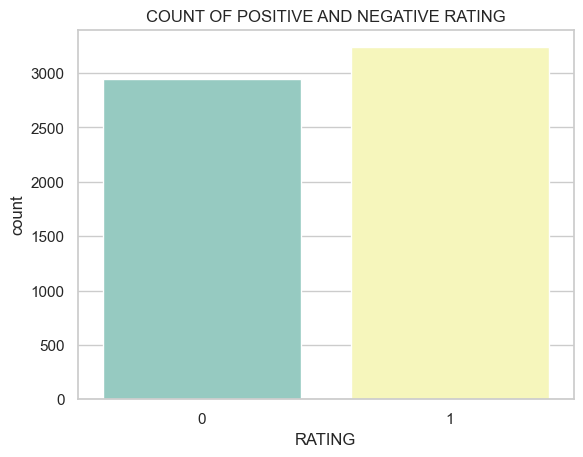

In [148]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="RATING", data=df_new, palette='Set3')
ax.set_title("COUNT OF POSITIVE AND NEGATIVE RATING")

In [63]:
##CHANGING NUMERICAL VALUES TO REAL AND FAKE 
df_new.loc[df_new['LABEL']== 0, 'LABEL']= 'FAKE'
df_new.loc[df_new['LABEL']== 1, 'LABEL']= 'REAL'

<AxesSubplot: xlabel='RATING', ylabel='count'>

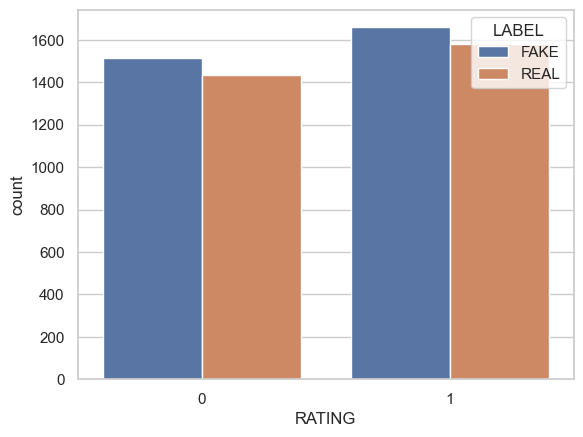

In [159]:
sns.countplot(x='RATING' , data=df_new, hue='LABEL')

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

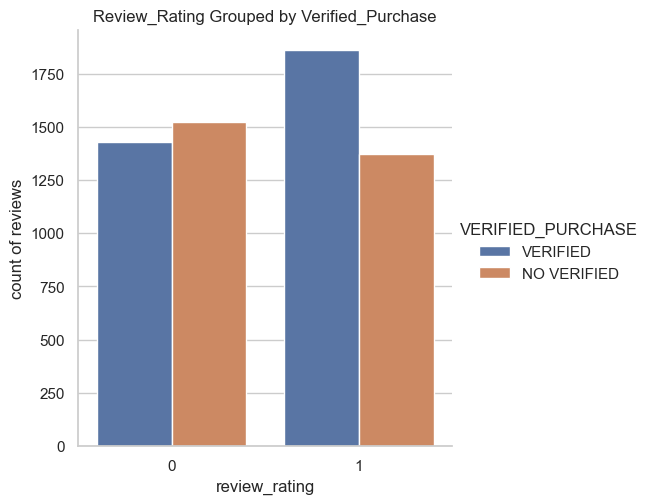

In [160]:
sns.catplot(x ='RATING',kind="count", hue="VERIFIED_PURCHASE", data=df_new)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

Text(0.5, 1.0, 'Review_Verified Grouped by Verified_Purchase')

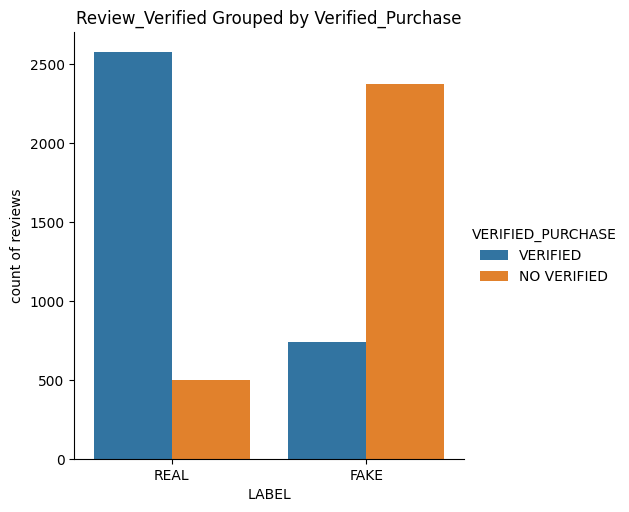

In [356]:
sns.catplot(x ='LABEL',kind="count", hue="VERIFIED_PURCHASE", data=df_new)
plt.xlabel("LABEL")
plt.ylabel("count of reviews")
plt.title("Review_Verified Grouped by Verified_Purchase")

In [155]:
df_new.head(2)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,15573,REAL,1,VERIFIED,Beauty,B001EJOPTS,Buf-Puf Double-Sided Body Sponge (Pack of 6),pretty darn good,works well and exfoliation is very thorough. I...,168
1,13778,REAL,1,VERIFIED,Furniture,B00C57AIGM,Englander Intrigue 7-Inch Quilted Innerspring ...,Very High qaulity,This mattress is sturdy and should hold up to ...,194


In [266]:
###CLEANING PROCESS 
##NULL VALUES 

###checking for null values. Null Values are zero.
df_new.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
TEXT_LENGTH          0
dtype: int64

<AxesSubplot: >

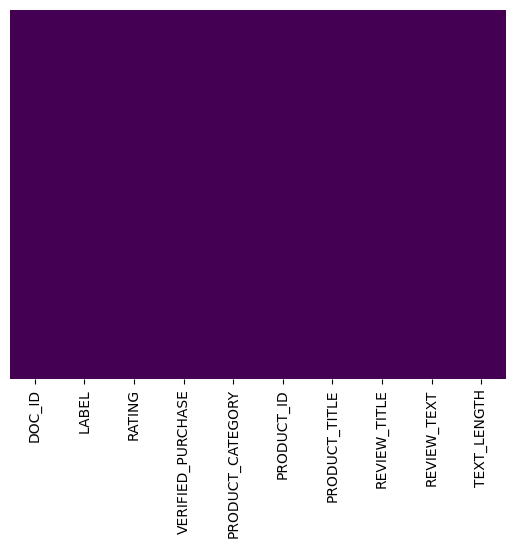

In [267]:
sns.heatmap(df_new.isnull(), yticklabels=False,cbar=False,cmap='viridis')
##This show us that we do not have null values in our data.

In [268]:
missing= pd.DataFrame(df_new.isnull().sum().sort_values())
missing

,0
DOC_ID,0
LABEL,0
RATING,0
VERIFIED_PURCHASE,0
PRODUCT_CATEGORY,0
PRODUCT_ID,0
PRODUCT_TITLE,0
REVIEW_TITLE,0
REVIEW_TEXT,0
TEXT_LENGTH,0


In [269]:
df_new['REVIEW_TEXT'].isnull().sum()

0

In [270]:
missing= pd.DataFrame(df_new.isnull().sum().sort_values()).reset_index()
missing.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
missing.head(9)

,col_name,null_count
0,DOC_ID,0
1,LABEL,0
2,RATING,0
3,VERIFIED_PURCHASE,0
4,PRODUCT_CATEGORY,0
5,PRODUCT_ID,0
6,PRODUCT_TITLE,0
7,REVIEW_TITLE,0
8,REVIEW_TEXT,0


In [ ]:
##CHECKING DUPLICATES 
# checking for any duplicate in the data
##df_new.duplicated().sum()
##df.duplicated()
##df.duplicated(subset=['REVIEW_TITLE','PRODUCT_TITLE'])
##df.loc[~df.duplicated(subset=['REVIEW_TITLE','PRODUCT_TITLE']) here we check if the values are not duplicated
##df.loc[df.duplicated()]
##df.loc[df.duplicated(subset=['REVIEW_TITLE'])]
##df.query("REVIEW_TITLE=='useful'")

In [ ]:
##df_new.duplicated('REVIEW_TITLE').sum()

In [ ]:
##df_new.duplicated('REVIEW_TEXT').sum()

In [275]:
##df_new.drop_duplicates(subset=['REVIEW_TITLE', 'REVIEW_TEXT'],keep=False, inplace=True)

C:\Users\brill\AppData\Local\Temp\ipykernel_16276\423917853.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df_new.corr()


<AxesSubplot: >

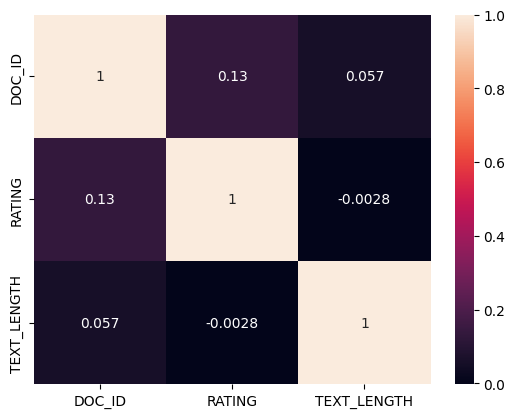

In [276]:
##relationship analysis(correlation matrix)
##at this stage as we have categorical values, there is not much information to help us in the anaysis.

correlation= df_new.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,
            annot=True)

In [ ]:
##rename columns 
##df.rename(columns={'LABEL': 'label', 'RATING': 'rating'})

In [ ]:
#Joining the columns we will use to train our model

##df['FAKEREVIEWS_TEXT'] = df['VERIFIED_PURCHASE'] + df['REVIEW_TEXT']

In [ ]:
#Check non-English reviews on our FAKEREVIEWS_TEXT column
##import langid
##ids_langid=df_new['REVIEW_TEXT'].apply(langid.classify)
##langs = ids_langid.apply(lambda tuple: tuple[0])
##print("Number of tagged languages (estimated):")
##print(len(langs.unique()))
##print("Percent of data in English (estimated):")
##print((sum(langs=="en")/len(langs))*100)

In [278]:
##langs_nonenglish = pd.DataFrame(langs)
##langs_nonenglish_count = langs_nonenglish.REVIEW_TEXT.value_counts()

In [ ]:
##langs_nonenglish_count
##As we can see the predominant language is Englis;however, we can find also other languages but they are few.

<AxesSubplot: >

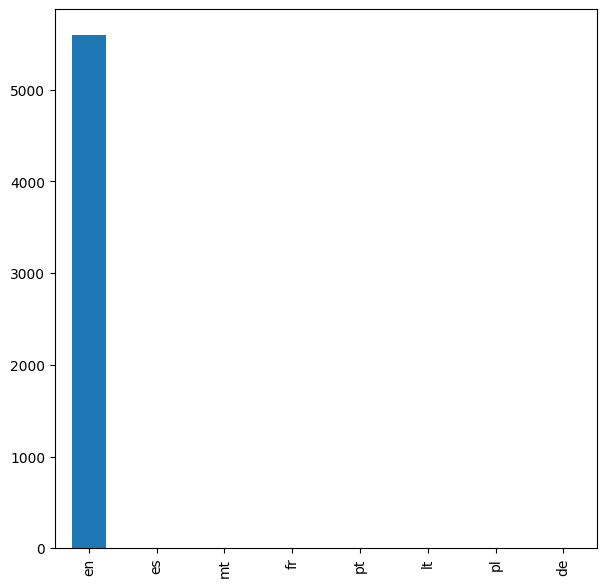

In [280]:
##langs_nonenglish_count.plot.bar(figsize=(7,7), fontsize=10)

In [281]:
##Removing other languages 
##df_new['REMOVED']=langs=="en"

In [ ]:
##df_new['REMOVED'].value_counts()

In [283]:
#removing non english review
##df_new=df_new[df_new['REMOVED'] == True]

In [ ]:
##see the data from a particular row 
##review_example=df.FAKEREVIEWS_TEXT[3]
##review_example

In [64]:
##CLEANING GENERAL SYMBOLS AND PUNCTUATION 
def clean_text(df_new, field):
    df_new[field] = df_new[field].str.replace(r"@"," at ")
    df_new[field] = df_new[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df_new[field] = df_new[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df_new[field] = df_new[field].str.replace(r"http\S+","")
    df_new[field] = df_new[field].str.lower()
    return df

clean_text(df_new,"REVIEW_TEXT")

def clean_text(df_new, field):
    df_new[field] = df_new[field].str.replace(r"@"," at ")
    df_new[field] = df_new[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df_new[field] = df_new[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df_new[field] = df_new[field].str.replace(r"http\S+","")
    df_new[field] = df_new[field].str.lower()
    return df

clean_text(df_new,"REVIEW_TITLE")

C:\Users\brill\AppData\Local\Temp\ipykernel_11884\2254680620.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new[field] = df_new[field].str.replace("#[^a-zA-Z0-9_]+"," ")
C:\Users\brill\AppData\Local\Temp\ipykernel_11884\2254680620.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new[field] = df_new[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
C:\Users\brill\AppData\Local\Temp\ipykernel_11884\2254680620.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new[field] = df_new[field].str.replace(r"http\S+","")
C:\Users\brill\AppData\Local\Temp\ipykernel_11884\2254680620.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new[field] = df_new[field].str.replace("#[^a-zA-Z0-9_]+"," ")
C:\Users\brill\AppData\Local\Temp\ipykernel_11884\2254680620.py:15: FutureWarning: The defa

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH
0,1,0,1,NO VERIFIED,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116
1,2,0,1,VERIFIED,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404
2,3,0,3,NO VERIFIED,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248
3,4,0,1,NO VERIFIED,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212
4,5,0,1,NO VERIFIED,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331
...,...,...,...,...,...,...,...,...,...,...
20995,20996,1,1,VERIFIED,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100
20996,20997,1,1,VERIFIED,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115
20997,20998,1,1,VERIFIED,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297
20998,20999,1,1,VERIFIED,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287


In [65]:
##APPLYING TOKENIZATION, STEAMMING AND LEMMATIZATION
from nltk.stem import PorterStemmer

def text_pre_processing(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # REMOVE PUNCTUATION
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    # TOKENIZE
    lst_text = text.split()
    # REMOVE STOPWORDS
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    # STEAMING (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    # LEMMATIZE (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    #BACK TO STRING
    text = " ".join(lst_text)
    return text

##df_new['title_clean'] = df_new['REVIEW_TITLE'].apply(lambda REVIEW_TITLE: text_pre_processing(REVIEW_TITLE))
df_new['text_clean'] = df_new['REVIEW_TEXT'].apply(lambda REVIEW_TEXT: text_pre_processing(REVIEW_TEXT))
df_new.head(2)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,text_clean
0,12046,REAL,1,VERIFIED,Watches,B00309HQPK,Casio Men's GW7900B-1 G-Shock Black Solar Spor...,superb watch,looks good and fits good on my hand br i lik...,125,look good and fit good on my hand br i like th...
1,5895,FAKE,1,NO VERIFIED,Electronics,B004HJ57VM,Pyle Home PICL45B Enhanced iPod/iPhone Alarm C...,radio wakeup,i'm happy i got this wasn't much for all...,202,im happy i got this wasnt much for all the clo...


In [66]:
####make text lowercase and removing symbols 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
# Applying the cleaning function to TEXT AND TITLE
df_new['text_clean'] = df_new['text_clean'].apply(lambda x: clean_text(x))
df_new['title_clean'] = df_new['REVIEW_TITLE'].apply(lambda x: clean_text(x))
# After cleaning 
df_new['text_clean'].head()

0    look good and fit good on my hand br i like th...
1    im happy i got this wasnt much for all the clo...
2    i love this because i use this still now it so...
3    the quality of the tent is very good and high ...
4    i started exercising and losing weight and get...
Name: text_clean, dtype: object

In [67]:
###REMOVING STOPWORDS
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_new['title_clean'] = df_new['title_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_new['text_clean'] = df_new['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [68]:
from bs4 import BeautifulSoup
##REMOVING  HTML  TAGS
def remove_html_tags_func(text):
    '''
    Removes HTML-Tags from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without HTML-Tags
    ''' 
    return BeautifulSoup(text, 'html.parser').get_text()

In [69]:
df_new['title_clean'] = df_new['title_clean'].apply(remove_html_tags_func)
df_new['text_clean'] = df_new['text_clean'].apply(remove_html_tags_func)

In [70]:
###REMOVING ACCENTS 
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df_new["text_clean"] = df_new["text_clean"].apply(remove_accent)
df_new["title_clean"] = df_new["title_clean"].apply(remove_accent)

print(df_new["text_clean"].iloc[168])

achy hand cut finger use stainless steel cable tie gun apply pressure tighten cable hose wire bundle remove excess cable tie clean installation


In [71]:
###CORRECTING CHARACTERS 

pattern = r"[\s]+"

df_new["text_clean"] = df_new["text_clean"].str.replace(pat=pattern, repl=" ", regex=True)
df_new["title_clean"] = df_new["title_clean"].str.replace(pat=pattern, repl=" ", regex=True)


print(df_new["text_clean"].iloc[168])
print(df_new["title_clean"].iloc[168])

achy hand cut finger use stainless steel cable tie gun apply pressure tighten cable hose wire bundle remove excess cable tie clean installation
great


In [214]:
##def remove_punctuation(text):
    ##final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    ##return final

In [72]:
##REMOVING EXTRA SYMBOLS
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string 

In [73]:
##df_new["text_clean"] = df_new["text_clean"].apply(remove_punctuation)
df_new["text_clean"] = df_new["text_clean"].apply(remove_symbols)

In [74]:
#Removing Emojis
def remove_emoji(string):
    emoji_pattern= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0" 
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE,
    )
    return emoji_pattern.sub(r" ", string)

In [75]:
df_new['text_clean']=df_new.text_clean.map(lambda x: remove_emoji(x))
df_new['title_clean']=df_new.title_clean.map(lambda x: remove_emoji(x))


In [297]:
##from spellchecker import SpellChecker

##spell = SpellChecker()
##def correct_spellings(text):
    ##corrected_text = []
    ##misspelled_words = spell.unknown(text.split())
    ##for word in text.split():
        ##if word in misspelled_words:
            ##corrected_text.append(spell.correction(word))
        ##else:
            ##corrected_text.append(word)
    ##return " ".join(corrected_text)
        
##text = "speling correctin"
##correct_spellings(text)

'spelling correcting'

In [ ]:
##df_new["text_clean"] = df_new["text_clean"].apply(correct_spellings)

In [76]:
###REMOVING WHITE SPACES

def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [77]:
df_new['title_clean'] = df_new['title_clean'].apply(remove_extra_whitespaces_func)
df_new['text_clean'] = df_new['text_clean'].apply(remove_extra_whitespaces_func)

In [78]:
##dropping columns 
df_new.drop(['DOC_ID'], axis=1,inplace=True)
df_new.drop(['PRODUCT_CATEGORY'], axis=1,inplace=True)
df_new.drop(['PRODUCT_ID'], axis=1,inplace=True)
df_new.drop(['PRODUCT_TITLE'], axis=1,inplace=True)
df_new.drop(['REVIEW_TEXT'], axis=1,inplace=True)
df_new.drop(['REVIEW_TITLE'], axis=1,inplace=True)



In [79]:
##Changing the Rating Label
df_new.loc[df_new['RATING']== 0, 'RATING']= 'LOW QUALITY'
df_new.loc[df_new['RATING']== 1, 'RATING']= 'GOOD QUALITY'

In [80]:
label_encoder=LabelEncoder()

df_new['LABEL']= label_encoder.fit_transform(df_new['LABEL']) 

In [81]:
# separating the data & label
X = df_new.drop(columns='LABEL', axis=1)
y = df_new['LABEL']

In [82]:
X['text_combined'] = X["text_clean"]+ " " +X["VERIFIED_PURCHASE"]+ " " +X["RATING"]##+" " +X["PRODUCT_CATEGORY"]##" " +X["title_clean1"]+   " " +["VERIFIED_PURCHASE"]
X.drop([ 'text_clean', 'VERIFIED_PURCHASE', 'RATING'], axis = 1, inplace = True)
X=X.text_combined

In [83]:
##split the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 32)## test_size= 0.2

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

f_r=TfidfVectorizer(min_df=0,max_df=0.8,use_idf=True,ngram_range=(1,3))

#transformed train reviews
f_r_train_reviews=f_r.fit_transform(X_train)

#transformed test reviews
f_r_test_reviews=f_r.transform(X_test)

print('tfidf_train:',f_r_train_reviews.shape)

print('tfidf_test:',f_r_test_reviews.shape)

tfidf_train: (4948, 300012)
tfidf_test: (1238, 300012)


In [ ]:
##shuffle 
##df.sample(frac=1).head(10)


In [ ]:
####TRAINING AND TEST THE DATA

In [ ]:
###MODELS: 

In [85]:
##Model Logistic Regression 

model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(f_r_train_reviews, y_train)##X_train,y_train

LogisticRegression(max_iter=10000)

In [86]:
pred_LR = model_LR.predict(f_r_test_reviews)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
2875,0,0
5400,1,1
405,0,0
1863,0,1
1325,0,0
...,...,...
2760,1,1
2216,0,0
3894,0,0
4033,0,0


In [87]:
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)

0.8206785137318255
[[534 124]
 [ 98 482]]


In [88]:
auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

AUC: 0.821292


In [89]:
pd.DataFrame(confusion_matrix(y_test,pred_LR), columns=['Predicted No', 'Predicted Yes'],index =['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,534,124
Actual Yes,98,482


In [90]:
##Classification report 
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,pred_LR ))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       658
           1       0.80      0.83      0.81       580

    accuracy                           0.82      1238
   macro avg       0.82      0.82      0.82      1238
weighted avg       0.82      0.82      0.82      1238



In [609]:
##deployment 
import pickle
##save the model to a file 
with open('logistic_regression_model.pkl', 'wb') as file: 
        pickle.dump(model_LR, file)

In [612]:
pickle.dump(f_r, open('tfidfvect2.pkl', 'wb'))

In [93]:
import pickle
namefile='logistic_regression_m.pkl'
pickle.dump(model_LR,open(namefile,'wb'))

In [99]:
import pickle
##vectorizer
namefile2='logistic_regression_vec.pkl'
pickle.dump(f_r,open(namefile2,'wb'))

In [94]:
##checking if the model works
def fake_reviews_det(reviews):
    input_data=[reviews]
    vectorized_input_data=f_r.transform(input_data)
    prediction = model_LR.predict(vectorized_input_data)
    print(prediction)

In [98]:
##Checking with a review from the amazon data set.
##0= Fake Review 
##1= Real Review
fake_reviews_det('The tablet form is very small as I am used to the capsules, so the container is a smaller, handy size. I cannot prove how effective they are but take them to compensate for lack of sun where I live.')

[1]


In [563]:
##MODEL: Passive Aggressive
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=10000)
classifier.fit(f_r_train_reviews,y_train)

PassiveAggressiveClassifier(max_iter=10000)

In [564]:
##  make the prediction
pred_pac = classifier.predict(f_r_test_reviews).round()##X_test
pd.DataFrame({'Actual': y_test, 'Predicted': pred_pac})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,0
1863,0,0
1325,0,0
...,...,...
2760,1,1
2216,0,0
3894,0,0
4033,0,0


In [565]:
## evaluate the model accuracy
accuracy_pac = accuracy_score(y_test, pred_pac)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_pac)

print(accuracy_pac)
print(conf_mat)

0.8222940226171244
[[524 112]
 [108 494]]


In [610]:
###deployment 
import pickle
##save the model to a file 
with open('passive_aggresive_model.pkl', 'wb') as file: 
        pickle.dump(classifier, file)

In [566]:
## MODEL: RANDOM FOREST
## random foresst regression
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(random_state=0)
RF.fit(f_r_train_reviews, y_train)

RandomForestClassifier(random_state=0)

In [567]:
rf_classifier = RF.predict(f_r_test_reviews)
pd.DataFrame({'Actual': y_test, 'Predicted': rf_classifier})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,0
1863,0,0
1325,0,0
...,...,...
2760,1,1
2216,0,1
3894,0,0
4033,0,0


In [568]:
accuracy_rf = accuracy_score(y_test, rf_classifier)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, rf_classifier)

print(accuracy_rf)
print(conf_mat)

0.7940226171243941
[[493 143]
 [112 490]]


In [569]:
## MODEL: MULTINOMIAL NB
from sklearn.naive_bayes import MultinomialNB
##model=MultinomialNB().fit(f_counts,y_train)

In [570]:

nb = MultinomialNB()

# fitting for tfidf vectorizer.
tfidf = nb.fit(f_r_train_reviews, y_train)

In [571]:
tfidf_val_predict = tfidf.predict(f_r_test_reviews)
print('Tfidf Vectorizer score :',accuracy_score(y_test, tfidf_val_predict))

Tfidf Vectorizer score : 0.7689822294022617


In [572]:
pd.DataFrame(confusion_matrix(y_test,tfidf_val_predict), columns=['Predicted No', 'Predicted Yes'],index =['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,517,119
Actual Yes,167,435


In [ ]:
###MODEL: SVM

In [573]:
clfLinear = svm.SVC(kernel='linear')

In [574]:
clfLinear.fit(f_r_train_reviews, y_train)

SVC(kernel='linear')

In [575]:
y_pred_linear = clfLinear.predict(f_r_test_reviews)
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,0
1863,0,0
1325,0,0
...,...,...
2760,1,1
2216,0,1
3894,0,0
4033,0,0


In [576]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.8206785137318255


In [611]:
##deployment 
import pickle
##save the model to a file 
with open('supervise_machine_model.pkl', 'wb') as file: 
        pickle.dump(clfLinear, file)

In [ ]:
##MODEL: DECISION TREE

In [577]:
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [578]:
Decision_tree_gini.fit(f_r_train_reviews,y_train)
Decision_tree_entropy.fit(f_r_train_reviews,y_train)
Decision_tree_max_depth.fit(f_r_train_reviews,y_train)

DecisionTreeClassifier(max_depth=5)

In [579]:
y_pred_gini = Decision_tree_gini.predict(f_r_test_reviews)
y_pred_entropy = Decision_tree_entropy.predict(f_r_test_reviews)
y_pred_depth3 = Decision_tree_max_depth.predict(f_r_test_reviews)

In [580]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
2875,1,0
5400,1,1
405,0,1
1863,0,0
1325,0,1
...,...,...
2760,1,1
2216,0,1
3894,0,0
4033,0,0


In [581]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,1
1863,0,0
1325,0,1
...,...,...
2760,1,1
2216,0,1
3894,0,0
4033,0,0


In [582]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,1
1863,0,0
1325,0,1
...,...,...
2760,1,1
2216,0,1
3894,0,0
4033,0,0


In [583]:
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
conf_mat_depth3 = confusion_matrix(y_test, y_pred_depth3)




print(accuracy_depth3)
print(conf_mat_depth3)

0.778675282714055
[[488 148]
 [126 476]]


In [584]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.7948303715670436
[[500 136]
 [118 484]]


In [585]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)




print(accuracy_entropy)
print(conf_mat_entropy)

0.7932148626817448
[[469 167]
 [ 89 513]]


In [586]:
##MODEL KNN 

## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(f_r_train_reviews, y_train)


KNeighborsClassifier()

In [587]:
## Make prediction
y_pred_knn = Knn_model.predict(f_r_test_reviews)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
2875,1,1
5400,1,1
405,0,1
1863,0,1
1325,0,0
...,...,...
2760,1,1
2216,0,0
3894,0,0
4033,0,1


In [588]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.6647819063004846
[[461 175]
 [240 362]]


In [589]:
###BERNOULLI NAIVE BAYES , this classification model can be used whenever we want to classify text on 2 classes
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB().fit(f_r_train_reviews, y_train)

In [590]:
prediction= model.predict(f_r_test_reviews)
print(prediction)

[0 0 0 ... 0 0 0]


In [591]:
accuracy_score(prediction,y_test)

0.561389337641357

In [44]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn import tree
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(f_r_train_reviews,y_train).tree_.max_depth<depth:
        break 
    score=np.mean(cross_val_score(tree_classifier,f_r_test_reviews,y_test,scoring='accuracy',
                                  cv=crossvalidation,n_jobs=1))
    print(depth,score)

1 0.7851232625229478
2 0.7738132703907683
3 0.7689680041961711
4 0.768974560713349
5 0.7665552058746393
6 0.7673747705218987
7 0.775445843168109
8 0.7649554156831891
9 0.7608969315499607
